In [77]:
import pandas as pd

df = pd.read_csv('Week8_Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [78]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [79]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [80]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [81]:
df = df.drop('Id' , axis = 1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


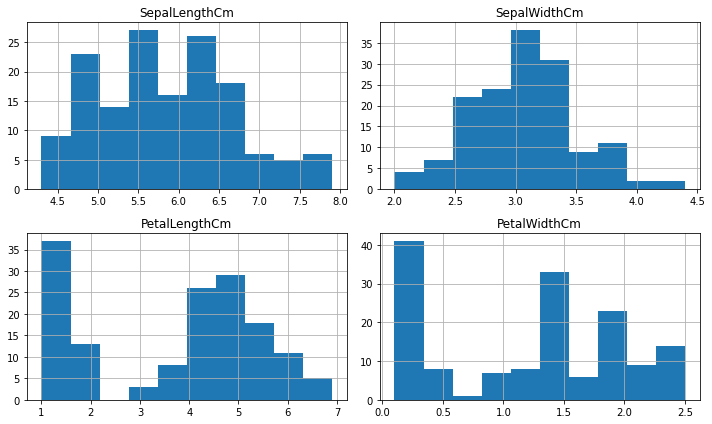

In [82]:
import matplotlib.pyplot as plt

df.hist(figsize=(10,6))
plt.tight_layout()
plt.show()

In [83]:
import seaborn as sns


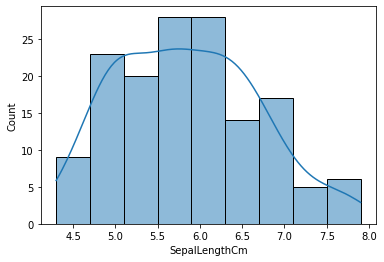

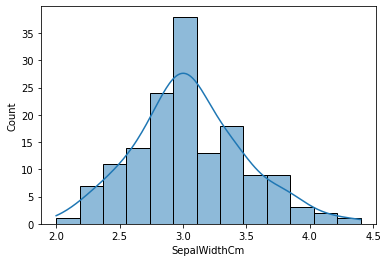

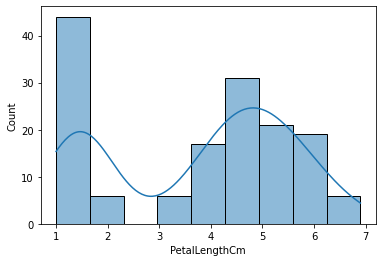

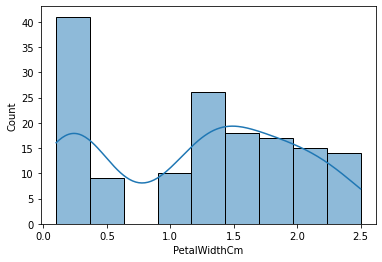

In [84]:
cols = df.drop('Species' , axis = 1)

for col in cols:
    sns.histplot(x=col , data=df , kde=True)
    plt.show()

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

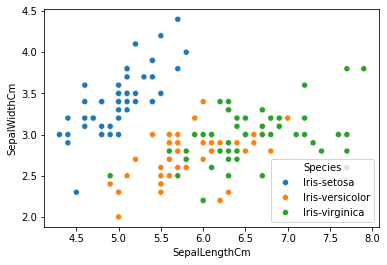

In [85]:
sns.scatterplot(x='SepalLengthCm' , y='SepalWidthCm' ,data=df ,hue='Species')
    

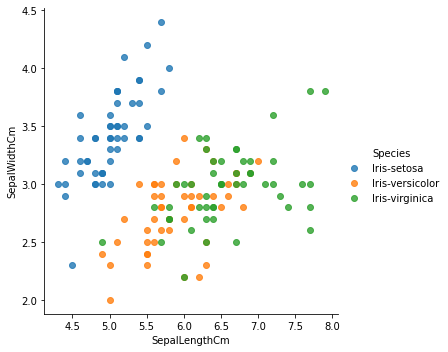

In [86]:
sns.lmplot(x='SepalLengthCm' , y='SepalWidthCm' , data=df ,hue='Species',fit_reg=False)

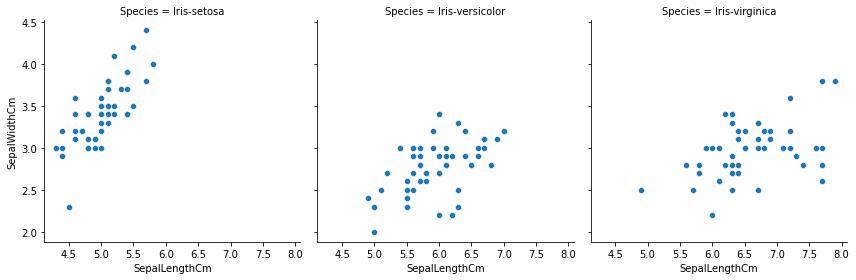

In [87]:
g = sns.FacetGrid(df , col ='Species' , height = 4 , aspect = 1)
g.map(sns.scatterplot , 'SepalLengthCm' , 'SepalWidthCm')
g.set_axis_labels('SepalLengthCm' , 'SepalWidthCm')
plt.show()

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

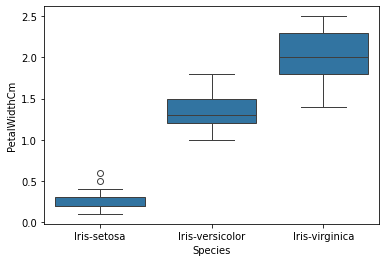

In [88]:
sns.boxplot(x='Species' , y ='PetalWidthCm' , data=df)

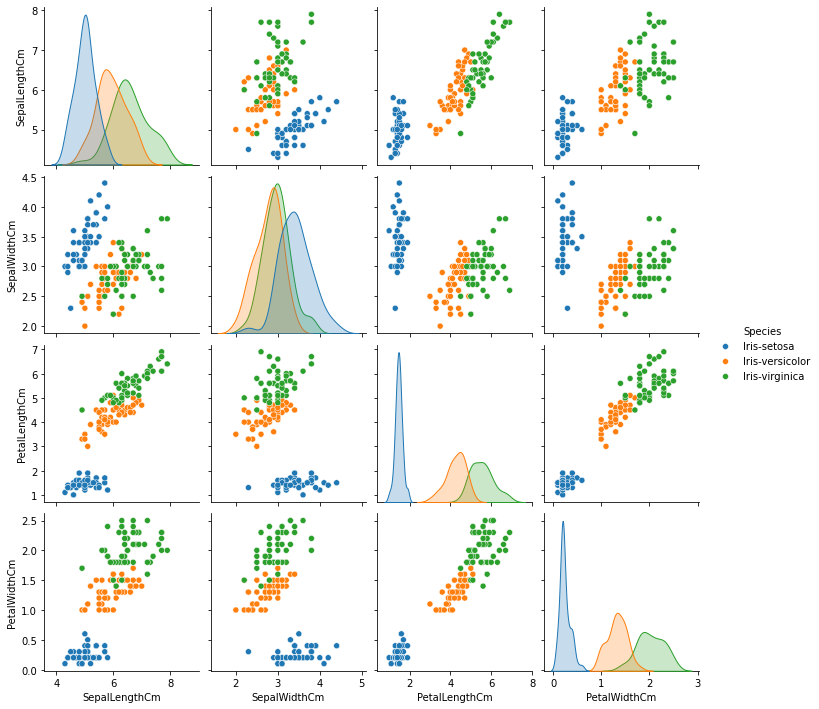

In [89]:
sns.pairplot(df , hue='Species')

In [90]:
s = df.drop('Species' , axis = 1)
s.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

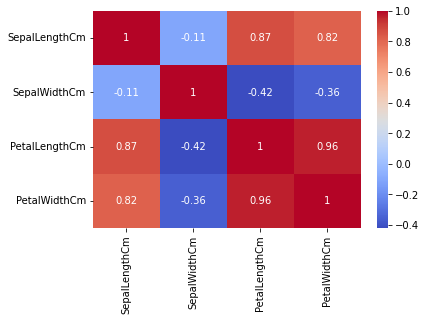

In [91]:
sns.heatmap(s.corr() , cmap='coolwarm' , annot = True)

In [92]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['Species'] = label.fit_transform(df['Species'])

In [93]:
x= df.drop('Species' , axis=1)
y=df['Species']

In [94]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1 , test_size=0.3)

In [95]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear',C=1)

In [96]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [97]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)
cm

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 13]])

In [98]:
model = SVC(kernel='linear')
kf = KFold(n_splits = 5 ,shuffle=True ,random_state=42)
score = cross_val_score(model , x,y , cv = kf)
score

array([1.        , 1.        , 0.96666667, 0.93333333, 0.96666667])

In [100]:
SVC = SVC(kernel = 'linear')
grid = {'C' : [0.1,1,10,100,1000]}
gs = GridSearchCV(SVC , grid , cv = kf , scoring = 'accuracy')
gs.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, scoring='accuracy')

In [101]:
gs.best_params_['C']

1

In [102]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [103]:
y_pred = tree.predict(x_test)

In [106]:
res = pd.DataFrame(gs.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002152,0.001022,0.001798,0.000834,0.1,{'C': 0.1},1.0,0.952381,0.952381,0.952381,0.904762,0.952381,0.030117,3
1,0.001281,0.000113,0.001164,0.000146,1.0,{'C': 1},1.0,0.952381,0.952381,1.000000,1.000000,0.980952,0.023328,1
2,0.001432,0.000301,0.001168,0.000168,10.0,{'C': 10},1.0,0.952381,0.952381,1.000000,1.000000,0.980952,0.023328,1
3,0.001173,0.000021,0.001032,0.000012,100.0,{'C': 100},1.0,0.952381,0.952381,0.952381,0.904762,0.952381,0.030117,3
4,0.001204,0.000073,0.001017,0.000014,1000.0,{'C': 1000},1.0,0.952381,0.952381,0.952381,0.904762,0.952381,0.030117,3


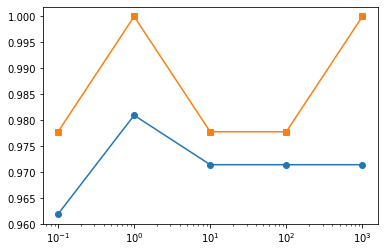

In [122]:
C_values = [0.1,1,10,100,1000]
train_scores =[]
test_scores = []
from sklearn.svm import SVC
for c in Cval:
    model = SVC(kernel = 'linear' , C=c)
    model.fit(x_train , y_train)
    train_scores.append(model.score(x_train,y_train))
    test_scores.append(model.score(x_test , y_test))
plt.plot(C_values , train_scores ,marker = 'o' ,label = 'Train Scores')
plt.plot(C_values , test_scores , marker = 's' ,label = 'Test Scores')
plt.xscale('log')
plt.show()